In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e23/train.csv')

In [3]:
df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount,defects
0,0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,...,17,1,1,0,16.0,9.0,38.0,22.0,5.0,False
1,1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,...,11,0,1,0,11.0,11.0,18.0,14.0,3.0,False
2,2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,...,8,0,1,0,12.0,11.0,28.0,17.0,3.0,False
3,3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,...,4,0,2,0,8.0,6.0,16.0,7.0,1.0,True
4,4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,...,7,0,2,0,7.0,6.0,10.0,10.0,3.0,False


In [4]:
df.shape

(101763, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101763 entries, 0 to 101762
Data columns (total 23 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 101763 non-null  int64  
 1   loc                101763 non-null  float64
 2   v(g)               101763 non-null  float64
 3   ev(g)              101763 non-null  float64
 4   iv(g)              101763 non-null  float64
 5   n                  101763 non-null  float64
 6   v                  101763 non-null  float64
 7   l                  101763 non-null  float64
 8   d                  101763 non-null  float64
 9   i                  101763 non-null  float64
 10  e                  101763 non-null  float64
 11  b                  101763 non-null  float64
 12  t                  101763 non-null  float64
 13  lOCode             101763 non-null  int64  
 14  lOComment          101763 non-null  int64  
 15  lOBlank            101763 non-null  int64  
 16  lo

In [6]:
df.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
defects              0
dtype: int64

In [7]:
df = df.drop(columns='id', axis=1)

# Encoding

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
LE = LabelEncoder()

In [10]:
df['defects'] =LE.fit_transform(df['defects'])

# Data Visualization

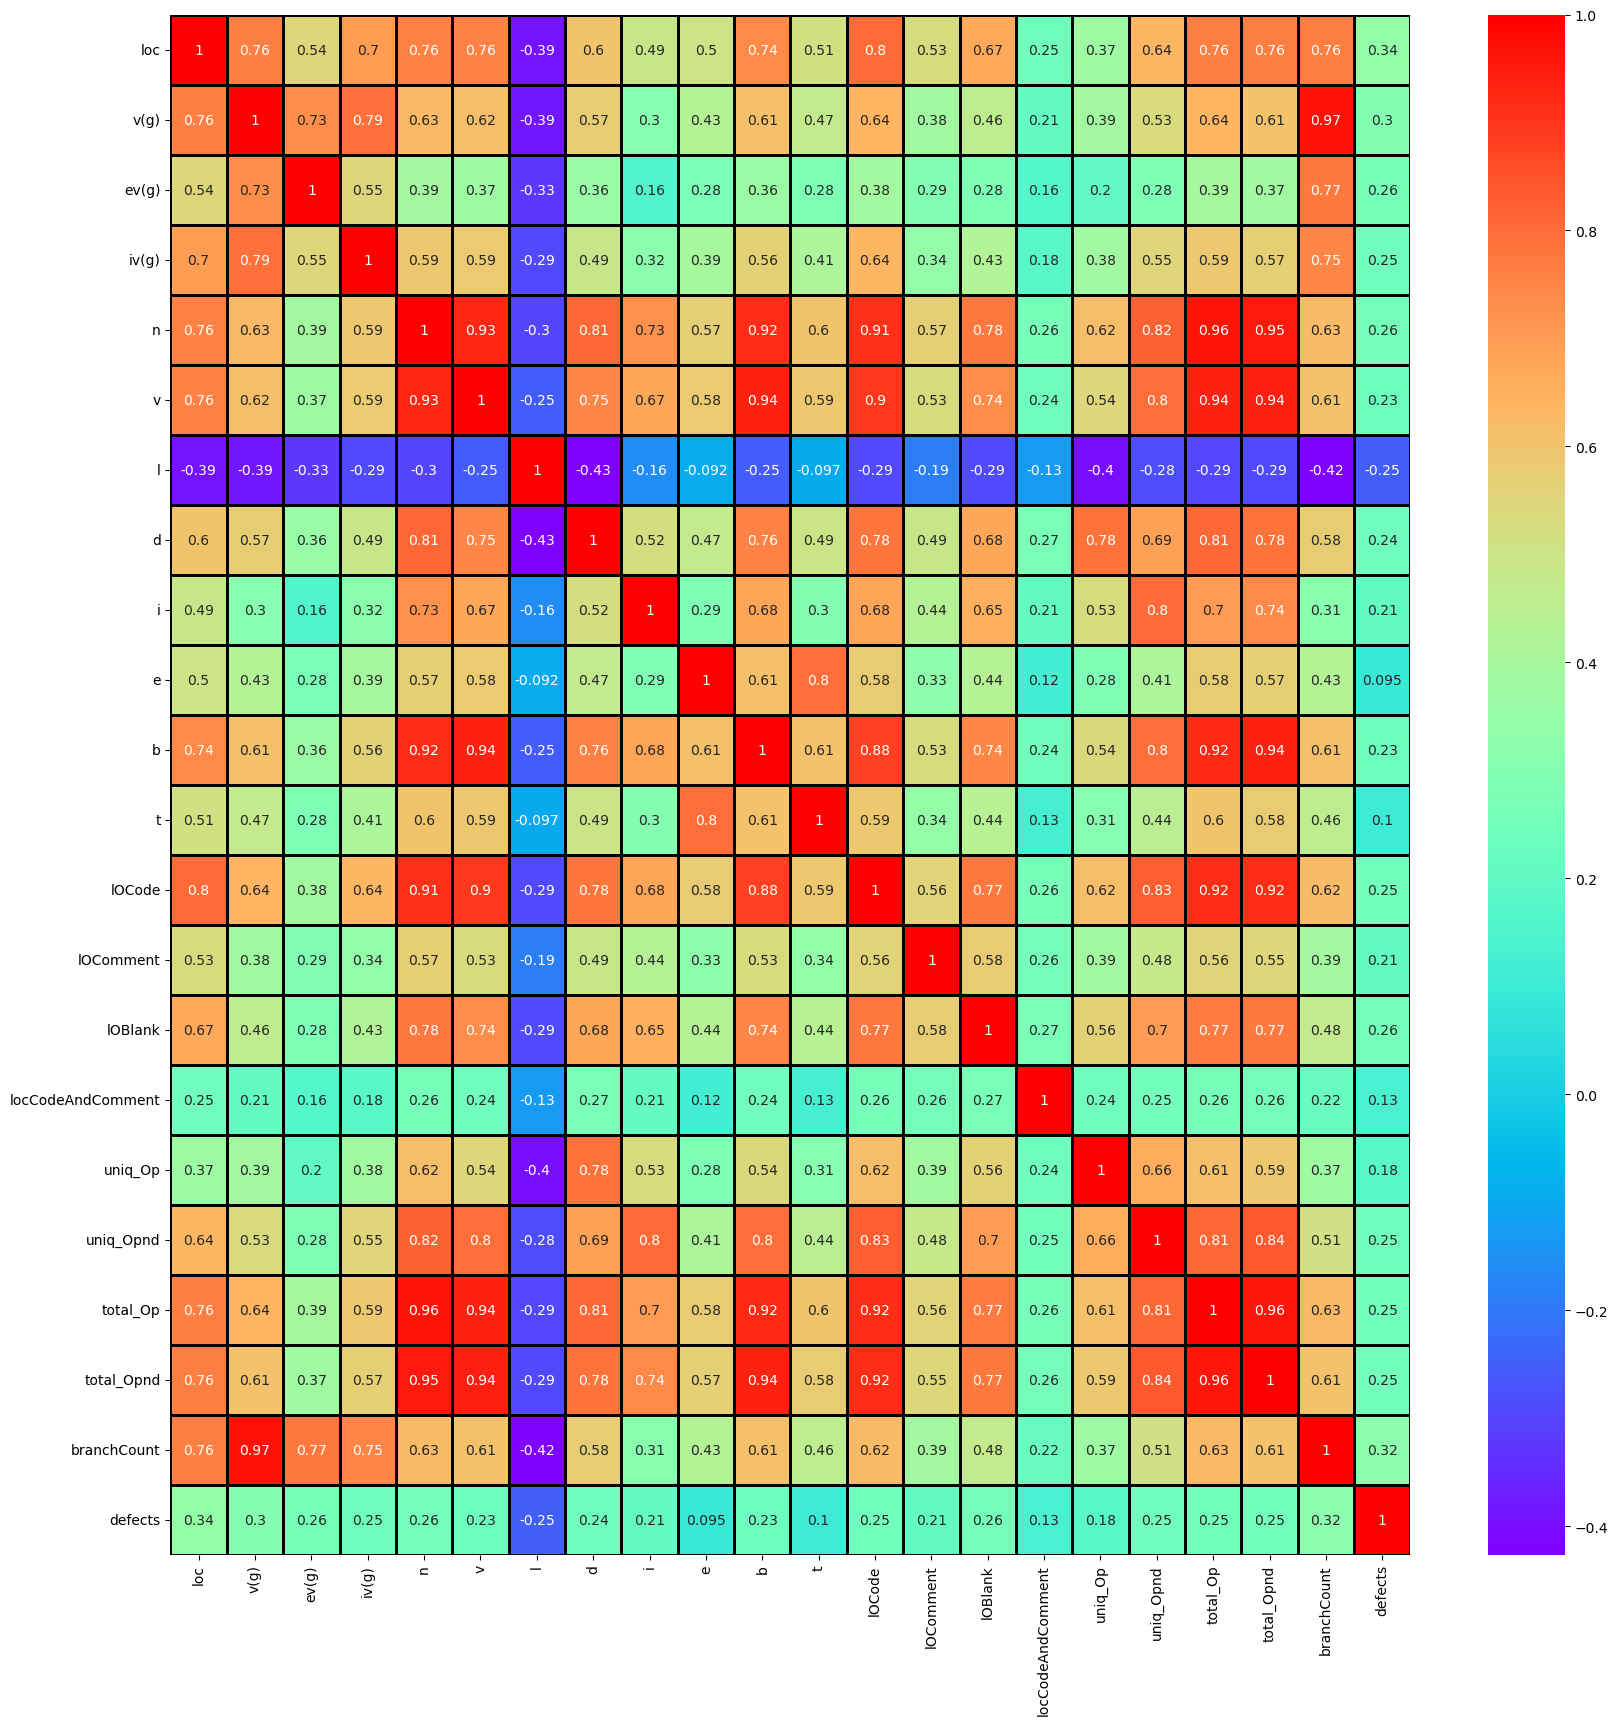

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='rainbow', annot=True, linecolor='black', linewidths=1)
plt.show()

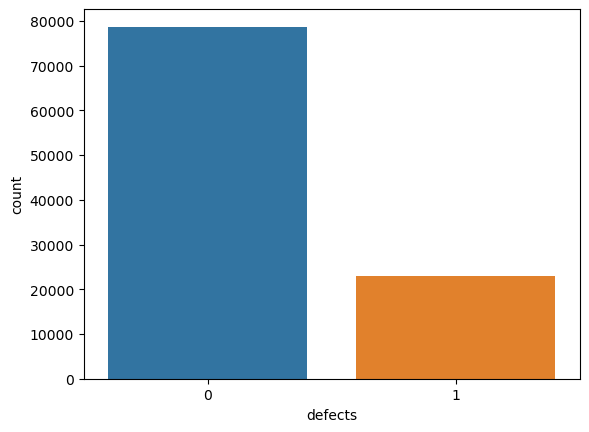

In [12]:
sns.countplot(data=df, x='defects')
plt.show()

# Train & Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.iloc[:, :-1]
X

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,22.0,3.0,1.0,2.0,60.0,278.63,0.06,19.56,14.25,5448.79,...,302.71,17,1,1,0,16.0,9.0,38.0,22.0,5.0
1,14.0,2.0,1.0,2.0,32.0,151.27,0.14,7.00,21.11,936.71,...,52.04,11,0,1,0,11.0,11.0,18.0,14.0,3.0
2,11.0,2.0,1.0,2.0,45.0,197.65,0.11,8.05,22.76,1754.01,...,97.45,8,0,1,0,12.0,11.0,28.0,17.0,3.0
3,8.0,1.0,1.0,1.0,23.0,94.01,0.19,5.25,17.86,473.66,...,26.31,4,0,2,0,8.0,6.0,16.0,7.0,1.0
4,11.0,2.0,1.0,2.0,17.0,60.94,0.18,5.63,12.44,365.67,...,20.31,7,0,2,0,7.0,6.0,10.0,10.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101758,10.0,2.0,1.0,1.0,28.0,122.98,0.15,6.60,18.63,811.70,...,45.09,7,0,1,0,11.0,8.0,16.0,12.0,3.0
101759,27.0,5.0,4.0,1.0,107.0,559.93,0.06,18.00,34.17,11268.27,...,626.01,23,0,2,0,18.0,20.0,67.0,40.0,9.0
101760,26.0,1.0,1.0,1.0,83.0,360.17,0.04,22.75,12.56,5893.69,...,327.43,20,0,4,0,10.0,8.0,51.0,28.0,1.0
101761,10.0,2.0,1.0,2.0,43.0,191.76,0.15,6.46,29.53,1534.04,...,85.22,7,0,1,0,11.0,14.0,24.0,19.0,3.0


In [15]:
y = df['defects']
y

0         0
1         0
2         0
3         1
4         0
         ..
101758    0
101759    0
101760    0
101761    0
101762    0
Name: defects, Length: 101763, dtype: int64

# Handling the class imbalance problem

In [16]:
from imblearn.over_sampling import RandomOverSampler

In [17]:
resample = RandomOverSampler()

In [18]:
tempX, tempy = resample.fit_resample(X, y)

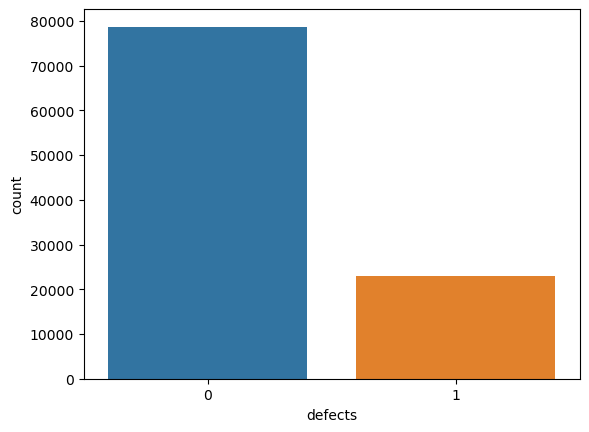

In [19]:
sns.countplot(data=df, x=y)
plt.show()

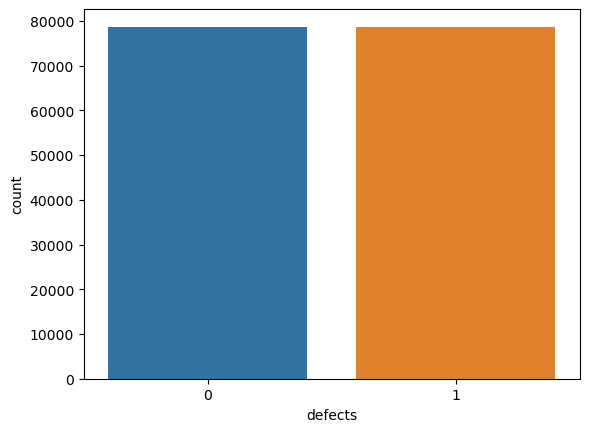

In [20]:
sns.countplot(data=df, x=tempy)
plt.show()

In [21]:
X_train, X_test, y_train, y_test = train_test_split(tempX, tempy, test_size=0.2, random_state=42)

# Model

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
RNF = RandomForestClassifier()

In [24]:
RNF.fit(X_train, y_train)

RandomForestClassifier()

In [25]:
y_hat = RNF.predict(X_test)

# Model Evaluation

In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
accuracy_score(y_test, y_hat)

0.9273506988564167

In [28]:
print(classification_report(y_test, y_hat))

              precision    recall  f1-score   support

           0       0.96      0.89      0.92     15637
           1       0.90      0.97      0.93     15843

    accuracy                           0.93     31480
   macro avg       0.93      0.93      0.93     31480
weighted avg       0.93      0.93      0.93     31480



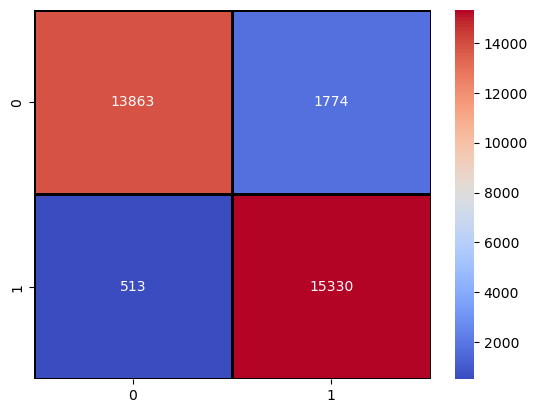

In [29]:
sns.heatmap(confusion_matrix(y_test, y_hat), cmap='coolwarm', fmt='.5g',annot=True, linecolor='black', linewidths=1)
plt.show()

# Submission

In [30]:
test_df = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e23/test.csv')

In [31]:
test_df.head()

,id,loc,v(g),ev(g),iv(g),n,v,l,d,i,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
0,101763,33.0,5.0,1.0,4.0,144.0,824.82,0.04,26.96,30.05,...,1257.60,30,0,3,0,21.0,23.0,87.0,57.0,9.0
1,101764,27.0,8.0,8.0,2.0,125.0,646.24,0.04,22.82,27.22,...,804.58,23,0,2,0,18.0,19.0,70.0,49.0,15.0
2,101765,130.0,11.0,7.0,10.0,545.0,3831.40,0.02,48.15,66.17,...,6453.34,99,9,17,1,26.0,53.0,333.0,244.0,21.0
3,101766,65.0,7.0,1.0,7.0,156.0,855.71,0.06,17.23,49.89,...,896.42,45,8,10,0,15.0,26.0,88.0,60.0,13.0
4,101767,22.0,3.0,1.0,3.0,52.0,238.42,0.10,9.60,26.70,...,145.80,16,0,4,0,12.0,15.0,30.0,24.0,5.0


In [32]:
test_df.isnull().sum()

id                   0
loc                  0
v(g)                 0
ev(g)                0
iv(g)                0
n                    0
v                    0
l                    0
d                    0
i                    0
e                    0
b                    0
t                    0
lOCode               0
lOComment            0
lOBlank              0
locCodeAndComment    0
uniq_Op              0
uniq_Opnd            0
total_Op             0
total_Opnd           0
branchCount          0
dtype: int64

In [33]:
test_X = test_df.drop(columns='id', axis=1)

In [34]:
predictions = RNF.predict_proba(test_X)

In [35]:
sub = pd.read_csv('/Users/kirtan/Downloads/playground-series-s3e23/sample_submission.csv')

In [36]:
sub.head()

,id,defects
0,101763,0.5
1,101764,0.5
2,101765,0.5
3,101766,0.5
4,101767,0.5


In [37]:
predictions

array([[0.72, 0.28],
       [0.7 , 0.3 ],
       [0.35, 0.65],
       ...,
       [0.8 , 0.2 ],
       [0.87, 0.13],
       [0.11, 0.89]])

In [38]:
len(predictions)

67842

In [39]:
sub['defects'] = predictions[:, 1]

In [40]:
sub

,id,defects
0,101763,0.28
1,101764,0.30
2,101765,0.65
3,101766,0.66
4,101767,0.34
...,...,...
67837,169600,0.34
67838,169601,0.15
67839,169602,0.20
67840,169603,0.13


In [41]:
sub.to_csv("/Users/kirtan/Downloads/playground-series-s3e23/final.csv",index=False)